In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## data sample preprocessing

In [2]:
data = np.load("../../data/data/image_triples2.npz")
print(len(data))
# %%
fimg_data = data['first_image']
simg_data = data['second_image']
mask_data = data['mask']

3


In [4]:
fimg_data.shape

(848, 256, 256, 3)

In [39]:
image = fimg_data[0]
rgb = cv2.normalize(image[:,:,[0,2,1]], None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)


In [41]:
image.shape

(256, 256, 3)

In [42]:
rgb.shape

(256, 256, 3)

In [7]:
type(image)

numpy.ndarray

In [8]:
print(f"original image intensity range : {image.min()}-{image.max()}")
print(f"preprocessed image intensity range {rgb.min()}-{rgb.max()}")

original image intensity range : 741-9966
preprocessed image intensity range 0-255


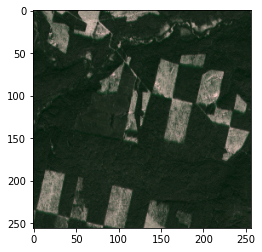

In [15]:
plt.imshow(rgb)

In [35]:
image = simg_data[0]
rgb = cv2.normalize(image[:,:,[0,2,1]], None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print(f"original image intensity range : {image.min()}-{image.max()}")
print(f"preprocessed image intensity range {rgb.min()}-{rgb.max()}")

original image intensity range : 347-2560
preprocessed image intensity range 0-255


## forest mask visualization

In [17]:
mask_data.shape

(848, 256, 256)

In [18]:
sample_mask = mask_data[0]
print(f"original mask intensity range : {sample_mask.min()}-{sample_mask.max()}")

original mask intensity range : 0-1


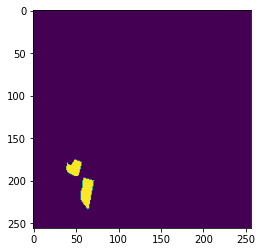

In [19]:
plt.imshow(sample_mask)

## image triplet visualization

In [33]:
f_image = fimg_data[0]
s_image = simg_data[0]
sample_mask = mask_data[0]

prep_fimage = cv2.normalize(f_image[:,:,[0,2,1]], None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
prep_simage = cv2.normalize(s_image[:,:,[0,2,1]], None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

Text(0.5, 1.0, 'deforestration mask')

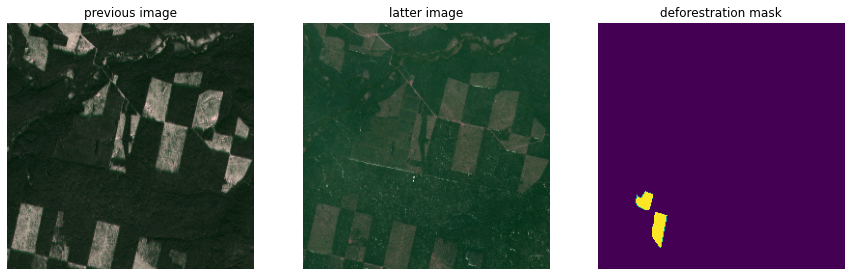

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(prep_fimage)
plt.axis("off")
plt.title("previous image")

plt.subplot(1,3,2)
plt.imshow(prep_simage)
plt.axis("off")
plt.title("latter image")

plt.subplot(1,3,3)
plt.imshow(sample_mask)
plt.axis("off")
plt.title("deforestration mask")

## image dataset preprocessing pipeline

In [49]:
prep_fimage = []
for i in range(fimg_data.shape[0]):
    prep_img = fimg_data[i,:,:,:]
    prep_fimage.append(cv2.normalize(prep_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U))

prep_simage = []
for i in range(simg_data.shape[0]):
    prep_img = simg_data[i,:,:,:]
    prep_simage.append(cv2.normalize(prep_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U))

In [50]:
prep_fimage = np.array(prep_fimage)
prep_simage = np.array(prep_simage)
print(f" shapes : {prep_fimage.shape} , {prep_simage.shape}")

 shapes : (848, 256, 256, 3) , (848, 256, 256, 3)


In [48]:
fimg_data[1,:,:,:].shape

(256, 256, 3)

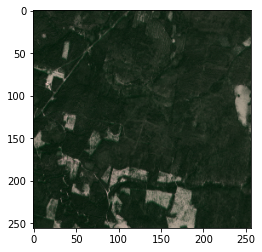

In [62]:
plt.imshow(prep_fimage[10][:,:,[0,2,1]])

In [ ]:
np.savez_compressed('../../data/data/train_data.npz', first_image=prep_fimage, second_image=prep_simage, mask=mask_data)

## histogram analysis

In [71]:
bgr_gray_image = cv2.cvtColor(prep_fimage[10][:,:,[0,1,2]], cv2.COLOR_BGR2GRAY)
rgb_gray_image = cv2.cvtColor(prep_fimage[10][:,:,[0,2,1]], cv2.COLOR_BGR2GRAY)

In [64]:
bgr_gray_hist = cv2.calcHist([bgr_gray_image], [0], None, [256], [0, 256])
rgb_gray_hist = cv2.calcHist([rgb_gray_image], [0], None, [256], [0, 256])

(0.0, 256.0)

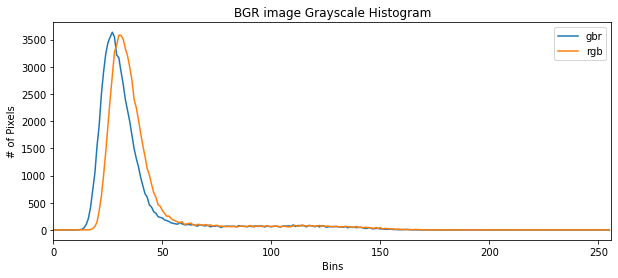

In [68]:
plt.figure(figsize=(10,4))

plt.plot(bgr_gray_hist)
plt.plot(rgb_gray_hist)
plt.legend(['gbr', 'rgb'])
plt.title("BGR image Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])


In [73]:
chans = prep_fimage[0]

2D histogram shape: (32, 32), with 1024 values


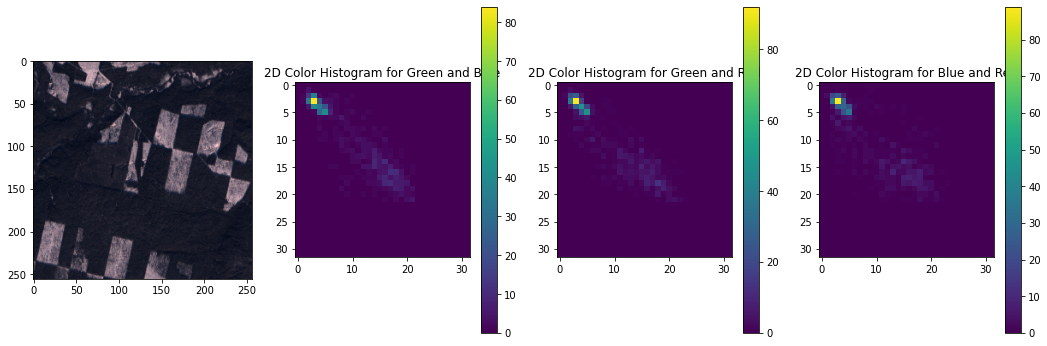

In [80]:
fig = plt.figure(figsize=(18,6))
# plot a 2D color histogram for green and blue
ax= fig.add_subplot(141)
ax.imshow(chans)

ax = fig.add_subplot(142)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)
# plot a 2D color histogram for green and red
ax = fig.add_subplot(143)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(144)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)
# finally, let's examine the dimensionality of one of
# the 2D histograms
print(f"2D histogram shape: {hist.shape}, with { hist.flatten().shape[0]} values")